In [ ]:
!git clone 'https://github.com/shaheer1995/deep_Mahalanobis_detector-V2'

Cloning into 'deep_Mahalanobis_detector-V2'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 4), reused 37 (delta 4), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [ ]:
%cd deep_Mahalanobis_detector-V2/

/content/deep_Mahalanobis_detector-V2


In [ ]:
%mkdir data

In [ ]:
%cd data

/content/deep_Mahalanobis_detector-V2/data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Research/OOD_Detector/Data
!ls
!cp Imagenet_resize.tar.gz /content/deep_Mahalanobis_detector-V2/data/
%cd /content/deep_Mahalanobis_detector-V2/data/
!ls
!tar -xvf Imagenet_resize.tar.gz

Streaming output truncated to the last 5000 lines.
Imagenet_resize/Imagenet_resize/5134.jpg
Imagenet_resize/Imagenet_resize/9125.jpg
Imagenet_resize/Imagenet_resize/2210.jpg
Imagenet_resize/Imagenet_resize/2041.jpg
Imagenet_resize/Imagenet_resize/998.jpg
Imagenet_resize/Imagenet_resize/1813.jpg
Imagenet_resize/Imagenet_resize/5445.jpg
Imagenet_resize/Imagenet_resize/3117.jpg
Imagenet_resize/Imagenet_resize/5029.jpg
Imagenet_resize/Imagenet_resize/4136.jpg
Imagenet_resize/Imagenet_resize/7152.jpg
Imagenet_resize/Imagenet_resize/7513.jpg
Imagenet_resize/Imagenet_resize/3113.jpg
Imagenet_resize/Imagenet_resize/392.jpg
Imagenet_resize/Imagenet_resize/4996.jpg
Imagenet_resize/Imagenet_resize/1516.jpg
Imagenet_resize/Imagenet_resize/9175.jpg
Imagenet_resize/Imagenet_resize/669.jpg
Imagenet_resize/Imagenet_resize/1521.jpg
Imagenet_resize/Imagenet_resize/9835.jpg
Imagenet_resize/Imagenet_resize/5050.jpg
Imagenet_resize/Imagenet_resize/4139.jpg
Imagenet_resize/Imagenet_resize/2386.jpg
Imagenet_

In [ ]:
%cd /content/drive/My\ Drive/Research/OOD_Detector/Data
!cp LSUN_resize.tar.gz /content/deep_Mahalanobis_detector-V2/data/
%cd /content/deep_Mahalanobis_detector-V2/data/
!tar -xvf LSUN_resize.tar.gz

Streaming output truncated to the last 5000 lines.
LSUN_resize/LSUN_resize/5134.jpg
LSUN_resize/LSUN_resize/9125.jpg
LSUN_resize/LSUN_resize/2210.jpg
LSUN_resize/LSUN_resize/2041.jpg
LSUN_resize/LSUN_resize/998.jpg
LSUN_resize/LSUN_resize/1813.jpg
LSUN_resize/LSUN_resize/5445.jpg
LSUN_resize/LSUN_resize/3117.jpg
LSUN_resize/LSUN_resize/5029.jpg
LSUN_resize/LSUN_resize/4136.jpg
LSUN_resize/LSUN_resize/7152.jpg
LSUN_resize/LSUN_resize/7513.jpg
LSUN_resize/LSUN_resize/3113.jpg
LSUN_resize/LSUN_resize/392.jpg
LSUN_resize/LSUN_resize/4996.jpg
LSUN_resize/LSUN_resize/1516.jpg
LSUN_resize/LSUN_resize/9175.jpg
LSUN_resize/LSUN_resize/669.jpg
LSUN_resize/LSUN_resize/1521.jpg
LSUN_resize/LSUN_resize/9835.jpg
LSUN_resize/LSUN_resize/5050.jpg
LSUN_resize/LSUN_resize/4139.jpg
LSUN_resize/LSUN_resize/2386.jpg
LSUN_resize/LSUN_resize/3382.jpg
LSUN_resize/LSUN_resize/8274.jpg
LSUN_resize/LSUN_resize/1464.jpg
LSUN_resize/LSUN_resize/1271.jpg
LSUN_resize/LSUN_resize/247.jpg
LSUN_resize/LSUN_resize/36.jp

In [ ]:
!pwd
%cd /content/deep_Mahalanobis_detector-V2/
%mkdir pre_trained

%cd /content/drive/My\ Drive/Research/OOD_Detector/pre_trained
!cp resnet_cifar10.pth /content/deep_Mahalanobis_detector-V2/pre_trained/
%cd /content/deep_Mahalanobis_detector-V2/pre_trained/
!ls

%cd /content/drive/My\ Drive/Research/food-101-densenet
!cp resnet50model.pth /content/deep_Mahalanobis_detector-V2/pre_trained/
%cd /content/deep_Mahalanobis_detector/pre_trained/
!ls

/content/deep_Mahalanobis_detector-V2/data
/content/deep_Mahalanobis_detector-V2
/content/drive/My Drive/Research/OOD_Detector/pre_trained
/content/deep_Mahalanobis_detector-V2/pre_trained
resnet_cifar10.pth
/content/drive/My Drive/Research/food-101-densenet
[Errno 2] No such file or directory: '/content/deep_Mahalanobis_detector/pre_trained/'
/content/drive/My Drive/Research/food-101-densenet
classes.txt  deep_Mahalanobis_detector-V2  resnet50model.pth


In [ ]:
%cd /content/deep_Mahalanobis_detector-V2

/content/deep_Mahalanobis_detector-V2


In [ ]:
# Load the network

from __future__ import print_function
import argparse
import torch
import data_loader
import numpy as np
import calculate_log as callog
import models
import os
import lib_generation
from torchvision import datasets, transforms, models
from torchvision import transforms
from torch.autograd import Variable
from torch import nn

# set the path to pre-trained model and output
pre_trained_net = './pre_trained/resnet50model.pth'

torch.cuda.set_device(0)

# check the in-distribution dataset
out_dist_list = ['svhn', 'imagenet_resize', 'lsun_resize']

# load networks
# model = models.ResNet50()
# model.load_state_dict(torch.load(pre_trained_net, map_location = "cuda:" + str(0)))
# in_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])
# Use the same architecture as used earlier
checkpoint = torch.load(pre_trained_net,  map_location = "cuda:" + str(0))
model = models.resnet50(pretrained=False)
for param in model.parameters():
  param.requires_grad = False

    
classifier = nn.Linear(2048, 101)
model.fc = classifier

model.load_state_dict(checkpoint['model_state'], strict=False)
in_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])
model.cuda()

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torchvision.models.resnet.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Check the saved model's last epoch and last validation loss
valid_loss = checkpoint["valid_loss_min"] 
num_epoch = checkpoint['epochs']

print(num_epoch)
print(valid_loss)

42
0.5302817171635014


In [ ]:
# Helper function to download data and extract
import os
def get_data():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [ ]:
%cd /content/deep_Mahalanobis_detector-V2/data/
get_data()
!ls

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/3452001.jpg
food-101/images/cannoli/1201456.jpg
food-101/images/cannoli/

In [ ]:
from collections import defaultdict
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src, dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
%cd /content/deep_Mahalanobis_detector-V2/data/food-101/

/content/deep_Mahalanobis_detector-V2/data/food-101


In [ ]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('/content/deep_Mahalanobis_detector-V2/data/food-101/meta/train.txt', '/content/deep_Mahalanobis_detector-V2/data/food-101/images', 'food-101/train')

# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('/content/deep_Mahalanobis_detector-V2/data/food-101/meta/test.txt', '/content/deep_Mahalanobis_detector-V2/data/food-101/images', 'food-101/test')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [ ]:
# Data augmentation
train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(45),
                                       transforms.RandomAffine(45),
                                       transforms.ColorJitter(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])

# Use 10-crop for Test Time Augmentation
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.TenCrop(224),
                                      transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
                                      transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])(crop) for crop in crops]))])

# Load the datasets with ImageFolder
train_data = datasets.ImageFolder("/content/deep_Mahalanobis_detector-V2/data/food-101/food-101/train", transform=train_transforms)
test_data = datasets.ImageFolder("/content/deep_Mahalanobis_detector-V2/data/food-101/food-101/test", transform=train_transforms)

# Using the image datasets and the tranforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= 64, shuffle = True)

In [ ]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find food-101/train -type d -or -type f -printf '.' | wc -c

# Check how many files are in the test folder
print("Total number of samples in test folder")
!find food-101/test -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750
Total number of samples in test folder
25250


In [ ]:
from torchvision import datasets

cifar10_train = torch.utils.data.DataLoader(
    datasets.CIFAR10('/media/tadenoud/DATADisk/datasets/cifar10/', train=True,download = True, transform=in_transform),
    batch_size=64, num_workers=2, pin_memory=True)
    
cifar10_val = torch.utils.data.DataLoader(
    datasets.CIFAR10('/media/tadenoud/DATADisk/datasets/cifar10/', train=False,download = True, transform=in_transform),
    batch_size=64, num_workers=2, pin_memory=True)

svhn_val = torch.utils.data.DataLoader(
    datasets.SVHN('/media/tadenoud/DATADisk/datasets/svhn', split='test',download = True, transform=in_transform),
    batch_size=64, num_workers=2, pin_memory=True)

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Extracting /media/tadenoud/DATADisk/datasets/cifar10/cifar-10-python.tar.gz to /media/tadenoud/DATADisk/datasets/cifar10/
Files already downloaded and verified


In [ ]:
print(len(train_loader))

1184


In [ ]:
import torch.nn.functional as F
def penultimate_forward(model, x):
        out = F.relu(model.bn1(model.conv1(x)))
        out = model.layer1(out)
        out = model.layer2(out)
        out = model.layer3(out)
        penultimate = model.layer4(out)
        return penultimate

In [ ]:
from tqdm.auto import tqdm

# Build the Mahalanobis Detector
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
all_features = np.empty((0,2048))
all_labels = np.empty(0)

for X, Y in tqdm(train_loader, total=len(train_loader)):
    X = X.to(device)
    print(X.shape)
    features = penultimate_forward(model,X)
    
    features = features.view((features.size(0), features.size(1), -1))
    features = torch.mean(features, 2)
    
    features = features.detach().cpu().numpy()
    
    all_features = np.concatenate((all_features, features), axis=0)
    all_labels = np.concatenate((all_labels, Y.detach().cpu().numpy()), axis=0)

torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size

In [ ]:
num_classes = 101
import sklearn.covariance

def estimate_mahalanobis_parameters(features, labels, return_tensor=False):
    class_means = []
    centered_features = features.copy()

    for i in range(num_classes):
        mask = labels == i

        # Calculate the class mean
        class_means.append(features[mask].mean(axis=0))

        # Create mean subtracted features for covariance estimation
        centered_features[mask] -= class_means[i]


    # Calculate the inverted covariance matrix
    group_lasso = sklearn.covariance.EmpiricalCovariance(assume_centered=False)
    group_lasso.fit(centered_features)
    precision = group_lasso.precision_
    covariance = group_lasso.covariance_
    
    if return_tensor:
        class_means = torch.from_numpy(np.array(class_means)).float().cuda()
        precision = torch.from_numpy(precision).float().cuda()
        covariance = torch.from_numpy(covariance).float().cuda()
    
    return class_means, precision, covariance

In [ ]:
# Run the detector on CIFAR-10 val and SVHN and compare results
class_means, precision, _ = estimate_mahalanobis_parameters(all_features, all_labels, return_tensor=True)

In [ ]:
def mahalanobis_distance(features, means, inv_mahal_cov, device):   
    """Return a matrix with dist to each mean for each feature in the features batch."""
    # Tile the features and means to vectorize the operation
    num_means = means.shape[0]
    num_feats = features.shape[0]

    features = features.repeat(1, num_means).view(-1, features.shape[1])

    # subtract means in batches
    x = features - means.repeat(num_feats, 1)

    # matmul, take diagonal, then reshape
    dists = x.mm(inv_mahal_cov).mm(x.transpose(0,1)).diag()
    dists = dists.view(num_feats, num_means).transpose(0,1)

    min_dists, labels = dists.min(dim=0)
    return labels, min_dists


def get_mahalanobis_distances(model, class_means, precision, device, id_loader, ood_loader):
    """Get the distance to the nearest class_mean and return that distance and the class label for
        all data in the id_loader and ood_loader."""
    model.eval()
    min_dists = []
    labels = []
    
    with torch.no_grad():
        for data, target in tqdm(id_loader, total=len(id_loader)):
            data, target = data.to(device), target.to(device)
            features = penultimate_forward(model,data)
            features = features.view((features.size(0), features.size(1), -1))
            features = torch.mean(features, 2)
            pred, min_dist = mahalanobis_distance(features, class_means, precision, device)
            min_dists.append(min_dist.detach().cpu().numpy())
            labels.append(target.detach().cpu().numpy())
            
        for data, target in tqdm(ood_loader, total=len(ood_loader)):
            data, target = data.to(device), target.to(device)
            features = penultimate_forward(model,data)
            features = features.view((features.size(0), features.size(1), -1))
            features = torch.mean(features, 2)
            pred, min_dist = mahalanobis_distance(features, class_means, precision, device)
            min_dists.append(min_dist.detach().cpu().numpy())
            labels.append(np.ones(len(target)) * -1)
            
    return np.concatenate(min_dists), np.concatenate(labels)

In [ ]:
dists, labels = get_mahalanobis_distances(model, class_means, precision, device, test_loader, cifar10_val)

In [ ]:
%cd /content

/content


In [ ]:
!git clone 'https://github.com/tayden/ood-metrics'

Cloning into 'ood-metrics'...
remote: Enumerating objects: 68, done.
remote: Total 68 (delta 0), reused 0 (delta 0), pack-reused 68
Unpacking objects: 100% (68/68), done.


In [ ]:
%cd /content/ood-metrics/

/content/ood-metrics


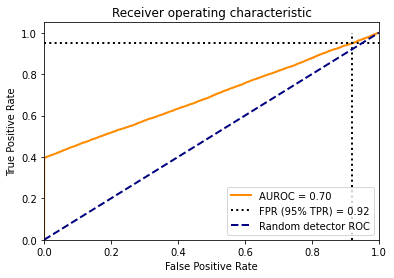

{'aupr_in': 0.3932067468704568,
 'aupr_out': 0.8796374848329561,
 'auroc': 0.6962930415841584,
 'detection_error': 0.2836312056737588,
 'fpr_at_95_tpr': 0.9212}

In [ ]:
%matplotlib inline

from ood_metrics import calc_metrics, plot_roc

labels[:10000] = 0
labels[10000:] = 1

plot_roc(dists, labels)
calc_metrics(dists, labels)
